# Second notebook with first exploratory analysis

In this second notebook we use the method designed in notebook 1 for creating a segmented image by applying it to every image from the database. The information on the area and centroid (center of mass) is then put into a pandas dataframe with each collumn representing a single plant. This dataframe is then appended with the actual LAI values. To gain insight into the data we then created several scatterplots to see correlations between the differing inputs with the LAI values. Finally we trained a simple linear regression.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 69, 20), (82, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

A for loop construction that applies the segmented image approach to all images in the dataset and places the area and centroid information in a dataframe

In [4]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    
print(results)
    

   Plant_number  Area_front                           Centroid_front  \
0        Plant1     72055.0   (321.6569009784193, 667.9332315592256)   
1        Plant2     68354.0   (335.5661702314422, 706.0572607309009)   
2        Plant3     40422.0  (401.83724209588837, 649.1364850823809)   
3        Plant4     62747.0  (331.01727572632956, 692.3932937032846)   
4        Plant5     56655.0   (351.8390433324508, 751.1261671520607)   
5        Plant6     36733.0   (376.9781667710233, 719.6792802112542)   
6        Plant7     58318.0  (398.34088960526765, 653.4697691964745)   
7        Plant8     69904.0  (419.84069581139846, 630.2788395513847)   
8        Plant9     62220.0  (437.33539054966246, 648.5444069431051)   
9       Plant10     41865.0    (406.4778693419324, 614.602651379434)   
10      Plant11     58057.0    (392.908744854195, 675.5261208812029)   
11      Plant12     96526.0    (350.6438472535897, 666.881534508837)   
12      Plant13     90898.0    (352.8019208343418, 696.223525270

In [5]:
PlantData = pd.read_csv("../PlantData.csv")

In [6]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

This results in the following dataframe for the LAI project

In [7]:
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI
0,Plant1,72055.0,"(321.6569009784193, 667.9332315592256)",94829.0,"(267.64921068449524, 690.1139208469983)",720.31
1,Plant2,68354.0,"(335.5661702314422, 706.0572607309009)",100518.0,"(307.62608687001335, 672.1429893153465)",843.04
2,Plant3,40422.0,"(401.83724209588837, 649.1364850823809)",56632.0,"(347.97875759288036, 682.7761159768329)",486.23
3,Plant4,62747.0,"(331.01727572632956, 692.3932937032846)",85578.0,"(332.1322185608451, 682.8729112622403)",826.31
4,Plant5,56655.0,"(351.8390433324508, 751.1261671520607)",70593.0,"(325.9290581219101, 603.0834926975763)",755.65
5,Plant6,36733.0,"(376.9781667710233, 719.6792802112542)",57026.0,"(381.7719812015572, 630.6437765229895)",750.63
6,Plant7,58318.0,"(398.34088960526765, 653.4697691964745)",57342.0,"(311.32932231174357, 742.8072965714485)",492.84
7,Plant8,69904.0,"(419.84069581139846, 630.2788395513847)",66562.0,"(314.4042396562603, 742.3711727412037)",797.91
8,Plant9,62220.0,"(437.33539054966246, 648.5444069431051)",57761.0,"(318.2378421426222, 730.4825920603868)",609.88
9,Plant10,41865.0,"(406.4778693419324, 614.602651379434)",59901.0,"(362.6250980784962, 743.9253267892021)",661.81


Scatterplots for all the different metrics in relation to the LAI values. In these plots a correlation is visable for the area top metric aswell as the area front, but to a lesser degree

<AxesSubplot:xlabel='LAI', ylabel='Area_top'>

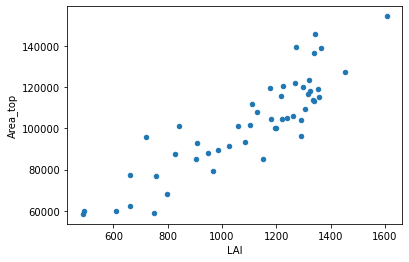

In [7]:
Data.plot.scatter(x = 'LAI', y = 'Area_top')

<AxesSubplot:xlabel='LAI', ylabel='Area_front'>

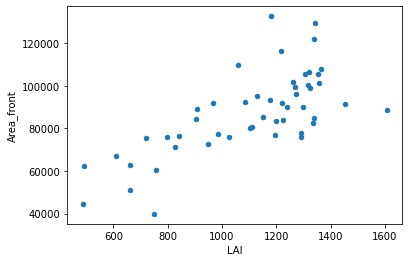

In [8]:
Data.plot.scatter(x = 'LAI', y = 'Area_front')

(30000.0, 150000.0)

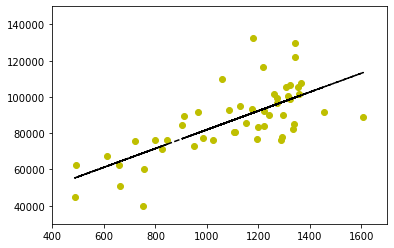

In [9]:
y = Data['Area_front']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(30000, 150000)

(30000.0, 170000.0)

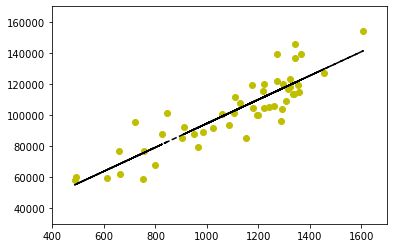

In [10]:
y = Data['Area_top']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(30000, 170000)

(600.0, 800.0)

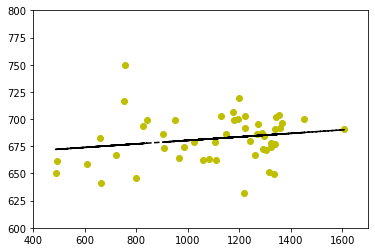

In [11]:
Data['Centroid_front.x'], Data['Centroid_front.y'] = zip(*Data.Centroid_front)
y = Data['Centroid_front.y']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(600, 800)

(300.0, 500.0)

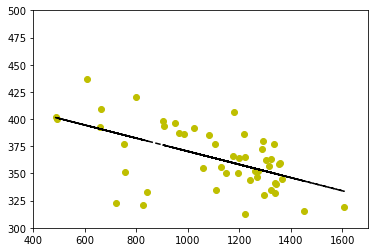

In [12]:
Data['Centroid_front.x'], Data['Centroid_front.y'] = zip(*Data.Centroid_front)
y = Data['Centroid_front.x']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(300, 500)

(300.0, 500.0)

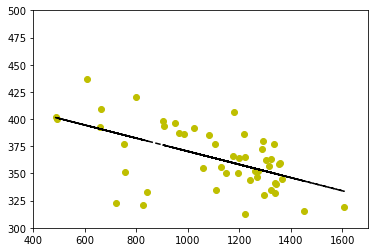

In [16]:
Data['Centroid_top.x'], Data['Centroid_top.y'] = zip(*Data.Centroid_front)
y = Data['Centroid_top.x']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(300, 500)

(300.0, 800.0)

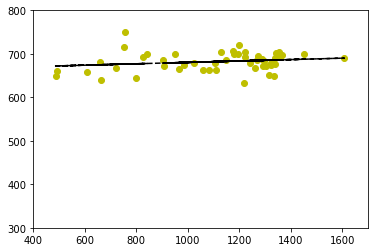

In [15]:
Data['Centroid_top.x'], Data['Centroid_top.y'] = zip(*Data.Centroid_front)
y = Data['Centroid_top.y']
x = Data['LAI'] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(400, 1700)
plt.ylim(300, 800)

With this information we train our first model, a linear regression model, Based on the the 2 areas as input, since they seem to have the highest impact. Train size 0.8 is chosen for all models in the future

In [8]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = Data.drop(columns = ['LAI']).copy()
y = Data['LAI']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [9]:
lr = LinearRegression()
 
X_train = X_train[["Area_top","Area_front"]]
 
 
lr.fit(X_train,y_train)    

LinearRegression()

The results of this model are shown below. On this test set the linear regression model has a MAE(mean absolute error) of 8,1% which is promising to say the least.

104.62158891737431
   Actuals  Predictions  Plant Numbers
2   964.64   895.446714              1
0  1199.86  1084.259041              2
3  1216.18  1318.826172              3
9  1220.36  1129.920750              4
8  1321.61  1304.586346              5
7  1335.69  1184.079329              6
5  1343.02  1600.924252              7
6  1358.58  1251.365515              8
4  1363.92  1481.405291              9
1  1606.91  1589.812129             10


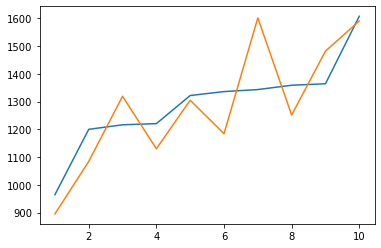

In [10]:
X_test = X_rem[["Area_top","Area_front"]]

close_predictions = lr.predict(X_test)   

mae = sum(abs(close_predictions - y_rem)) / y_rem.shape[0]


print(mae)
lin_reg_results = pd.DataFrame(columns = ['Actuals'])
lin_reg_results['Predictions'] = close_predictions
lin_reg_results['Actuals'] = y_rem.to_list()




lin_reg_results.sort_values(by=['Actuals'],inplace = True)
lin_reg_results['Plant Numbers'] = np.arange(1,11).tolist()
print(lin_reg_results)

plt.plot(lin_reg_results['Plant Numbers'],lin_reg_results['Actuals'],lin_reg_results['Plant Numbers'],lin_reg_results['Predictions'])

In [11]:
mae/np.average(lin_reg_results['Actuals'])

0.08090901695519627